## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [24]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

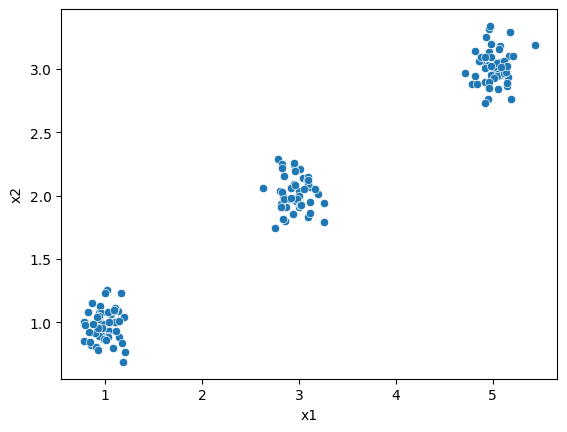

In [25]:
import seaborn as sns

sns.scatterplot(data = df0_125, x = "x1", y = 'x2')

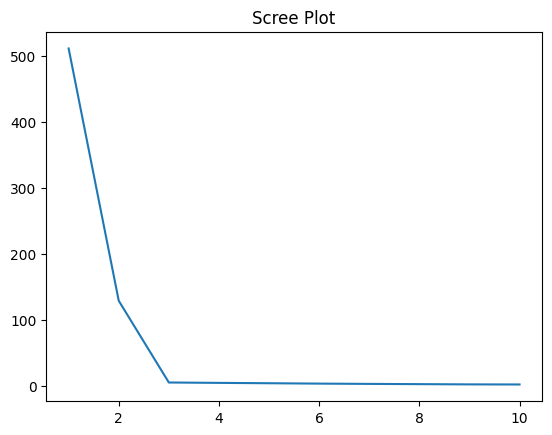

In [26]:
df0_125 = df0_125[['x1', 'x2']]
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df0_125)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

<Axes: xlabel='x1', ylabel='x2'>

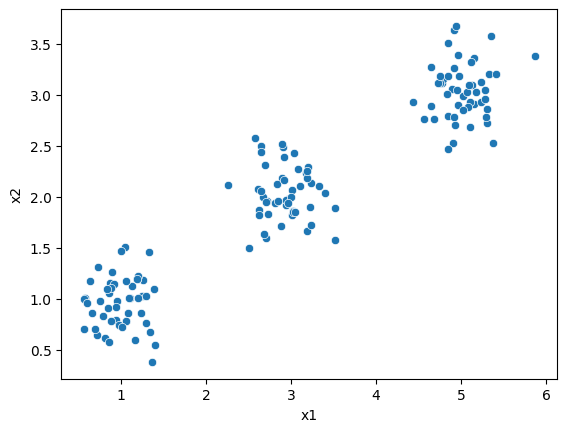

In [27]:
import seaborn as sns

sns.scatterplot(data = df0_25, x = "x1", y = 'x2')

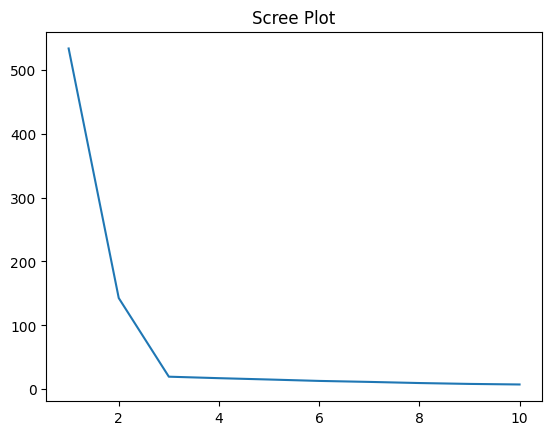

In [28]:
df0_25 = df0_25[['x1', 'x2']]
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df0_25)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

<Axes: xlabel='x1', ylabel='x2'>

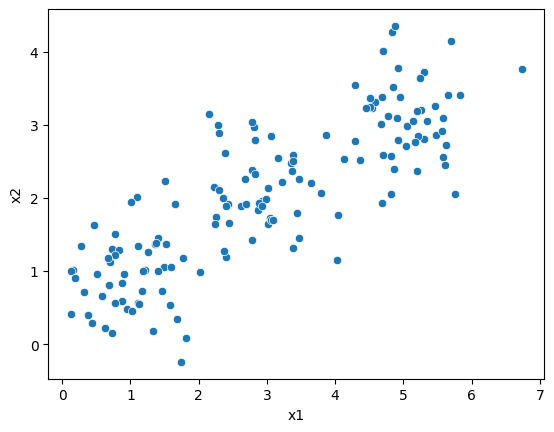

In [29]:
import seaborn as sns

sns.scatterplot(data = df0_5, x = "x1", y = 'x2')

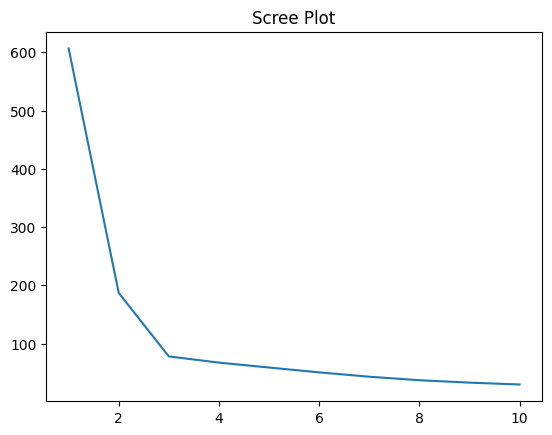

In [30]:
df0_5 = df0_5[['x1', 'x2']]
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df0_5)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

<Axes: xlabel='x1', ylabel='x2'>

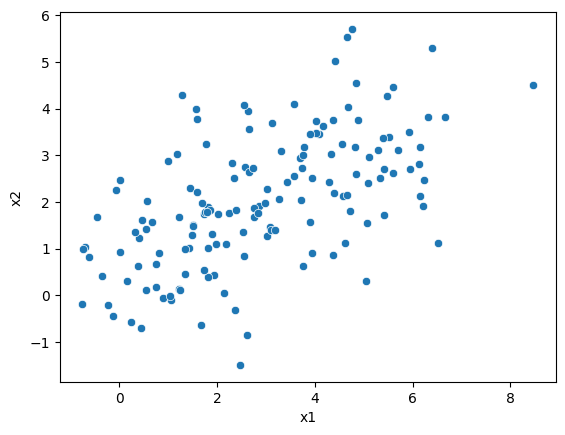

In [31]:
import seaborn as sns

sns.scatterplot(data = df1_0, x = "x1", y = 'x2')

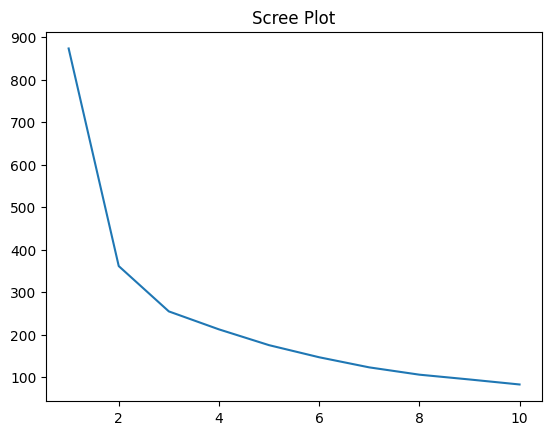

In [32]:
df1_0 = df1_0[['x1', 'x2']]
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df1_0)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

<Axes: xlabel='x1', ylabel='x2'>

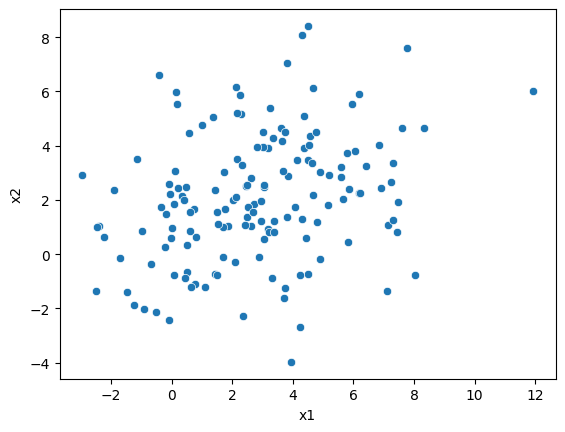

In [33]:
import seaborn as sns

sns.scatterplot(data = df2_0, x = "x1", y = 'x2')

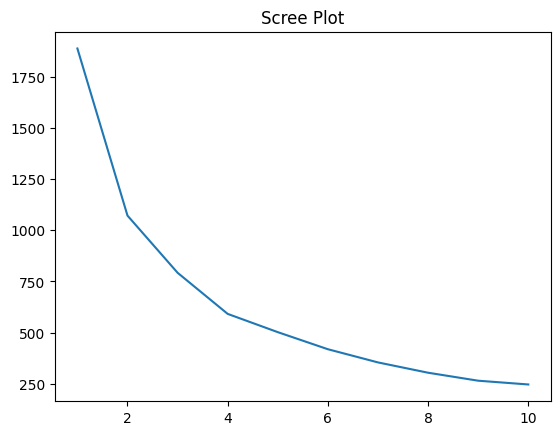

In [34]:
df2_0 = df2_0[['x1', 'x2']]
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df2_0)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

As the noise goes up, the visual distinctness of the clusters dissapears and the data is more spread out.

As the amount of noise increases, the elbow for the scree plot becomes less defined. This makes it harder to select k as there is a less distinct point to determine when there is no more gain from running the trial again.

The intuition of the elbow is finding the point of decreasing marginal returns. Up to a certain k value, there is a decrease in SSe, which means that the model is getting better. But at that certain point, there is no longer a massive return in decreasing SSe, and therefore it is no longer useful to keep increasing k. In the numerical example above, that point is around 3 when there is little amounts of noise in the data. This means that any more clusters will not make the model significantly better, and will likely just be a waste of resources.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [66]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/RyanErm/clustering/refs/heads/main/assignment/data/airbnb_hw.csv")


In [67]:
data

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [76]:
print(data['Price'].unique())

data['Price'] = pd.to_numeric(data['Price'], errors = "coerce")


[145.  37.  28. 199. 549. 149. 250.  90. 270. 290. 170.  59.  49.  68.
 285.  75. 100. 150. 700. 125. 175.  40.  89.  95.  99. 499. 120.  79.
 110. 180. 143. 230. 350. 135.  85.  60.  70.  55.  44. 200. 165. 115.
  74.  84. 129.  50. 185.  80. 190. 140.  45.  65. 225. 600. 109.  nan
  73. 240.  72. 105. 155. 160.  42. 132. 117. 295. 280. 159. 107.  69.
 239. 220. 399. 130. 375. 585. 275. 139. 260.  35. 133. 300. 289. 179.
  98. 195.  29.  27.  39. 249. 192. 142. 169. 131. 138. 113. 122. 329.
 101. 475. 238. 272. 308. 126. 235. 315. 248. 128.  56. 207. 450. 215.
 210. 385. 445. 136. 247. 118.  77.  76.  92. 198. 205. 299. 222. 245.
 104. 153. 349. 114. 320. 292. 226. 420. 500. 325. 307.  78. 265. 108.
 123. 189.  32.  58.  86. 219. 800. 335.  63. 229. 425.  67.  87. 158.
 650. 234. 310. 695. 400. 166. 119.  62. 168. 340. 479.  43. 395. 144.
  52.  47. 529. 187. 209. 233.  82. 269. 163. 172. 305. 156. 550. 435.
 137. 124.  48. 279. 330. 134. 378.  97. 277.  64. 193. 147. 186. 264.
  30. 

In [77]:
print(data['Beds'].unique())

data['Beds'] = pd.to_numeric(data['Beds'], errors = "coerce")


[ 1.  3.  2.  4.  5. nan  6. 10.  7.  8. 12.  0. 16.  9. 11.]


In [78]:
print(data["Number Of Reviews"].unique())

data['Number Of Reviews'] = pd.to_numeric(data['Number Of Reviews'], errors = "coerce")
data['Number Of Reviews'] = data['Number Of Reviews'].dropna()

[  0   1  39   4   9  80  95  23  14 120  81  17  32  52   3 171  16  19
   2  28  62   6   5  12  40  47  13  35  34  68  42   7  41  15  21   8
  10  29 112  25 132  51 156  30  98  24  74  20 188 221  57  11 242  67
 118  60 136 119  79 106  43  91 105  96 141 146  63  58  18 150  38  55
  89  46  77  48  36  69  26  73  53 165  92  87 108 109  50 127  88  83
 184 179  22  31  82  27 123 247 190 257 217  85 103 157 102  56 125 115
  49  97  54  65  90  44  33 100  37 107 114 116  61 104  71  75 145  84
  93 110 172 148 131 154  86  64  76 129  45 180 140  78 200 175 189 170
 187  72 137  99 101  59  94 124 223 173 151 142 163 121 256 248 149 128
 133  66 117 176 111  70 183 218 192 206 161 216 191 213 178 122 153 177
 167 113 126 135 181 138 143 195 182 198 211 166 139 134 144 174 159 155
 203 201 164 212 236 235 130]


In [79]:
print(data['Review Scores Rating'].unique)

data['Review Scores Rating'] = pd.to_numeric(data['Review Scores Rating'], errors = "coerce")
data['Review Scores Rating'] = data['Review Scores Rating'].dropna()

<bound method Series.unique of 0         NaN
1         NaN
2         NaN
3         NaN
4        96.0
         ... 
30473     NaN
30474     NaN
30475     NaN
30476     NaN
30477     NaN
Name: Review Scores Rating, Length: 30478, dtype: float64>


In [80]:
data_clean = data[["Number Of Reviews", "Beds", "Review Scores Rating", "Price"]]
data_clean = data_clean.dropna()
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x
for column in data_clean.columns:
  data_clean[column] = maxmin(data_clean[column])

In [82]:
print(data_clean.isna().sum())

Number Of Reviews       0
Beds                    0
Review Scores Rating    0
Price                   0
dtype: int64


KMeans(n_clusters=6, n_init=10, random_state=0)


**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?